# Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [36]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
# pull in ab testing dataframe
df_ab = pd.read_csv('ab_data.csv')
df_ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
# explore variables, types and entry count
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [5]:
df_ab['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df_ab.query('converted == 1').count()

user_id         35237
timestamp       35237
group           35237
landing_page    35237
converted       35237
dtype: int64

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
# Used stackoverflow to find a way to query 2 variables
df_ab[(df_ab['landing_page'] == 'old_page') & (df_ab['group'] == 'control')].count()

user_id         145274
timestamp       145274
group           145274
landing_page    145274
converted       145274
dtype: int64

In [8]:

df_ab[(df_ab['landing_page'] == 'new_page') & (df_ab['group'] == 'treatment')].count()

user_id         145311
timestamp       145311
group           145311
landing_page    145311
converted       145311
dtype: int64

In [9]:
Count =  294478-(145311)
Count


149167

Count is the number of times new_page and treatment do not match. 3893 rows include rows that new page and treatment don't match and old page and control don't match. 149167 times the treatment and new page don't match

f. Do any of the rows have missing values?

In [10]:
df_ab.isnull().sum()
#There are no missing values

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df_treatmatch = df_ab[(df_ab['landing_page'] == 'new_page') & (df_ab['group'] == 'treatment')]
df_controlmatch = df_ab[(df_ab['landing_page'] == 'old_page') & (df_ab['group'] == 'control')]
df2 = df_treatmatch.append(df_controlmatch)

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2['user_id'].nunique()
# 290584 unique user ids

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2['user_id'].duplicated().sum()
pd.Series(df2['user_id'])[pd.Series(df2['user_id']).duplicated()].values
# Looks like the duplicated user id is 773192

array([773192])

c. What is the row information for the repeat **user_id**? 

In [15]:
df2.query('user_id == 773192')
# user id is not unique, but has a different time stamp

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2 = df2.drop_duplicates(['user_id'], keep = 'last')
# decided to keep the last user_id reported

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 2 to 294476
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
len(df2[df2['converted'] == 1])

34753

In [19]:
prob = 34753/290584
prob

0.11959708724499628

11.96% of users converted on either landing page

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df_control = df2.query('group == "control"')
control_prob = len(df_control[df_control['converted'] == 1])/len(df_control)
control_prob


0.1203863045004612

12.04% of users converted that were in the control group

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df_treatment = df2.query('group == "treatment"')
treatment_prob = len(df_treatment[df_treatment['converted'] == 1])/len(df_treatment)
treatment_prob

0.11880806551510564

11.88% of users converted that were in the treatment group

d. What is the probability that an individual received the new page?

In [22]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000619442226688

50% of users received the new landing page

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Based on the results and probability. There is not enough sufficient evidence that the new_page converts better than the old_page. In fact it looks as if the new_page has "treatment group" looks to have a slight lower probability than the old_page "control group".

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null: Pold = Pnew
Alt: Pold =!Pnew


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [30]:
# 0.11959708724499628 is the conversion rate for ab data
len(df2[df2['converted'] == 1])/len(df2)

0.11959708724499628

a. What is the **conversion rate** for $p_{new}$ under the null?

Under the null it would be 0.1195970872449962

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

Under the null it would be 0.1195970872449962

c. What is $n_{new}$, the number of individuals in the treatment group?

In [31]:
len(df_treatment)

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
len(df_control)

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [42]:
new_page_converted = np.random.choice(df2['converted'], len(df_treatment), replace = True)
print(new_page_converted)

[0 1 0 ..., 0 0 0]


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [43]:
old_page_converted = np.random.choice(df2['converted'], len(df_control), replace = True)
print(old_page_converted)    

[0 0 0 ..., 0 0 0]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [45]:
diff = new_page_converted.mean()-old_page_converted.mean()
diff

-0.001509708804933757

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [52]:
bootsample = []
for _ in range(10000):
    new = np.random.choice(df2['converted'], len(df_treatment), replace = True)
    old = np.random.choice(df2['converted'], len(df_control), replace = True)
    p_diffs = new.mean() - old.mean()
    bootsample.append(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

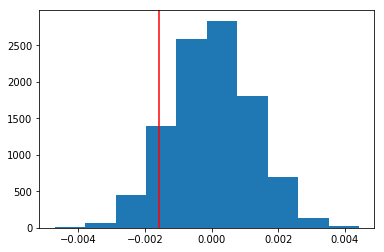

In [62]:
plt.hist(bootsample);
plt.axvline(x=ab_diffs, color = 'red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [61]:
ab_diffs = (treatment_prob - control_prob)
p_diffs_array = np.array(bootsample)
sum(p_diffs_array > ab_diffs)/len(p_diffs_array)

0.90290000000000004

90.2% of the p_diffs are greater than the null p_diff ab_data

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j. we just computed the p_diffs that were larger than our null. By creating these simulations we created a large number of samples to get closer to the actual p_diffs. We want to see if there is large enough difference to reject the null hypothesis and according to our significance level we only are at 90% so we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [63]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

convert_old = len(df_control[df_control['converted'] == 1])
convert_new = len(df_treatment[df_treatment['converted'] == 1])
n_old = len(df_control)
n_new = len(df_treatment)

print(convert_old)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [64]:
conv_count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new ])
stat, pval = proportions_ztest(conv_count, nobs)
print('{0:0.3f}'.format(pval))

0.190


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The larger p-value indicates that we fail to reject our null hypothesis since it is greater than our level of significance. Yes they align with our findings in parts j and k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should be performing a logistic regression.

In [70]:
df2_copy = df2.copy()
df2_copy.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [71]:
df2_copy[['control', 'treatment']] = pd.get_dummies(df2_copy['group'])
df2_copy.head()

,user_id,timestamp,group,landing_page,converted,control,treatment
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1


In [72]:
df2_copy = df2_copy.drop('control', axis = 1)

In [73]:
df2_copy['intercept'] = 1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [74]:
logit_mod = sm.Logit(df2_copy['converted'], df2_copy[['intercept', 'treatment']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 09 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        22:25:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [75]:
np.exp(-0.015)

0.98511193960306265

The coefficient on this log model suggests that if the user was shown the new_page the odds the user will convert is 0.98 more likely to convert than a user that wasn't shown that page. Which really means that really isn't an effect on conversion rate if a user is shown either page. Based on the models summary statistics we can see that the p_value is quite large making the treatment variable statistically insignificant. 

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

The pvalue that I found for the treatment variable is different from the p value associated with ab_page because of the way the variable is used. For regression it is a predictor while for the ab_page its the difference between the type of pages
For the null if b1 = 0 then treatment does not affect the conversion rate. If b1 =! 0 then treatment does affect the conversion rate.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

There are many factors that could influence someone to convert on a website such as the audience thats being targeted. The disadvantages are that adding in too many additional terms could cause your model to be weaker and variables to become insignificant. You are also prone to multicollinearity with many variables.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [76]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [81]:
df2new = df2_copy.join(df_countries.set_index('user_id'), on = 'user_id')
df2new.head()

,user_id,timestamp,group,landing_page,converted,treatment,intercept,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [82]:
country_dummies = pd.get_dummies(df2new['country'])

In [83]:
df2new = df2new.join(country_dummies)
df2new.head()

,user_id,timestamp,group,landing_page,converted,treatment,intercept,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [84]:
df2clean = df2new.drop('CA', axis = 1)

In [85]:
df2clean.head()

,user_id,timestamp,group,landing_page,converted,treatment,intercept,country,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,0,0


In [92]:
logit_mod = sm.Logit(df2clean['converted'], df2clean[['intercept', 'UK', 'US']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 09 Mar 2019   Pseudo R-squ.:               1.521e-05
Time:                        22:37:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [94]:
np.exp(0.0507)

1.0520072437650141

In [95]:
np.exp(0.0408)

1.0416437559600236

The coefficient on this log model suggests that if the user is from the US the odds the user will convert is 1.05 times more likely to convert than a user that that is not from the US holding all others constant. If the user is from the UK the odds the user will convert is 1.04 times more likely to convert holding all others constant. Which really means the effect on conversion rate is very small. Based on the models summary statistics we can see that the p_value is still does not meet the 0.05 significance criteria which in turns makes the variables insignificant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [88]:
logit_mod = sm.Logit(df2clean['converted'], df2clean[['intercept', 'UK', 'US', 'treatment']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 09 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        22:36:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

The coefficient on this log model suggests that if the user is from the US the odds the user will convert is 1.05 times more likely to convert than a user that that is not from the US holding all others constant. If the user is from the UK the odds the user will convert is 1.04 times more likely to convert holding all others constant. The coefficient on this log model suggests that if the user was shown the new_page the odds the user will convert is 0.98 more likely to convert than a user that wasn't shown that page. Which really means the effect on conversion rate is very small. Based on the models summary statistics we can see that the p_values still do not meet the 0.05 significance criteria which in turns makes the variables insignificant.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])